In [1]:
from parinterp import Linear2DInterpolator
import numpy as np
import os
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from scipy.interpolate import griddata

In [2]:
arrays = {}

for item in list(os.walk('/homes/lbelkov/griddata/'))[1:]:
    arrays[item[0][2:][len('omes/lbelkov/griddata/'):]] = np.load(item[0] + '/' + item[2][0], allow_pickle=True)
ids = tuple(arrays.keys())

  0%|          | 0/4 [00:00<?, ?it/s]

interpolated points shape (582680, 2)
q99 delta = 1.1531063609311332e-05
max delta = 31.816679718873274
num of points where delta > q99_delta = 9401


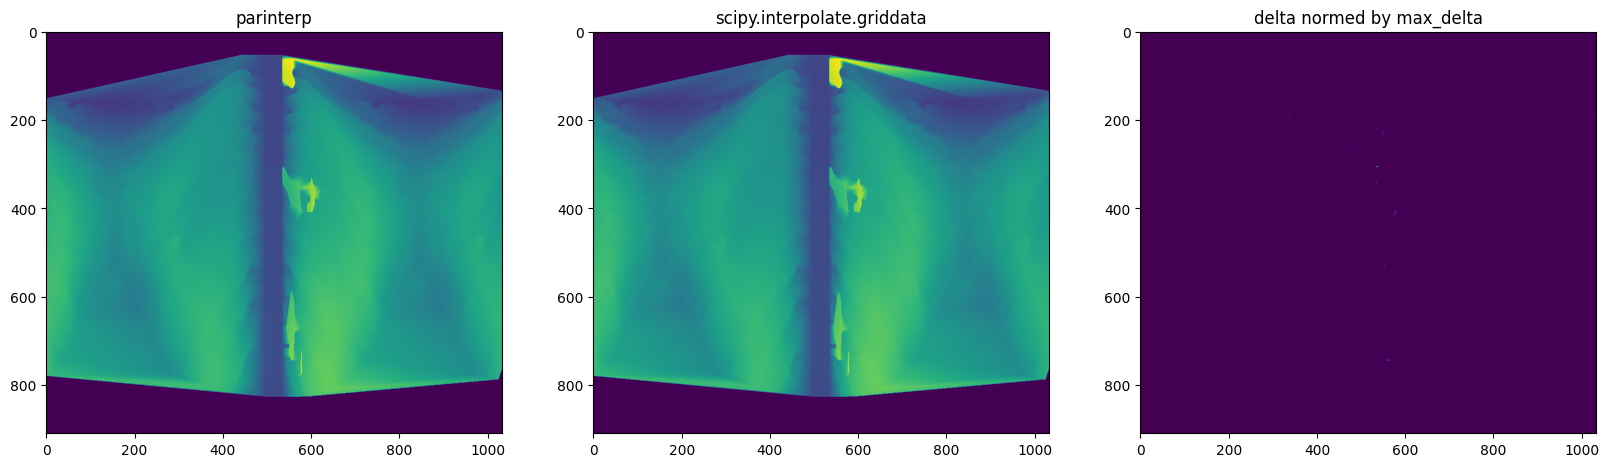

interpolated points shape (646775, 2)
q99 delta = 1.1668929986399237e-05
max delta = 9.02198988533712
num of points where delta > q99_delta = 11014


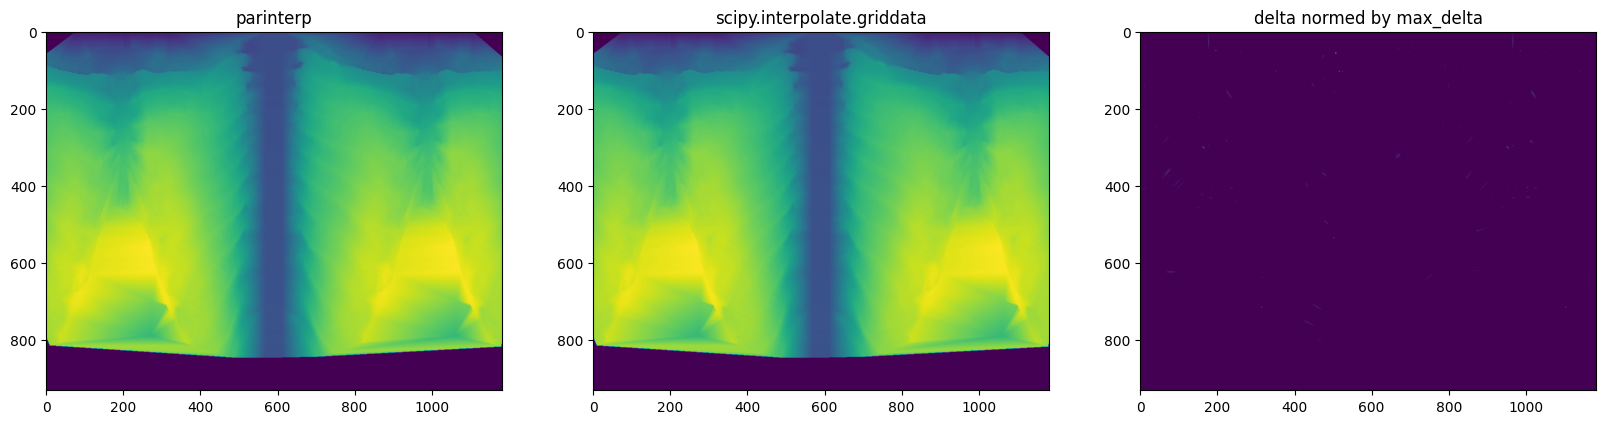

interpolated points shape (291334, 2)
q99 delta = 1.1689370381873232e-05
max delta = 19.951403244930972
num of points where delta > q99_delta = 4561


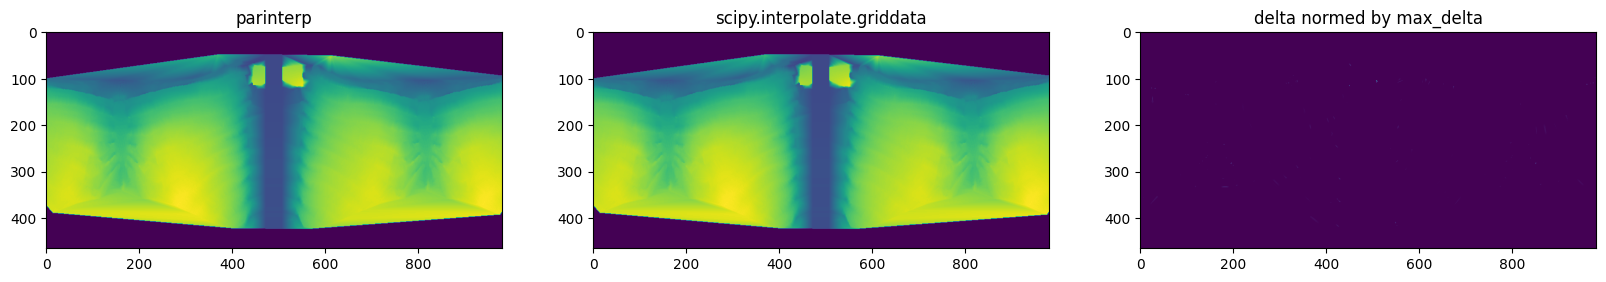

interpolated points shape (480439, 2)
q99 delta = 1.1139968458167005e-05
max delta = 32.84759370596845
num of points where delta > q99_delta = 6335


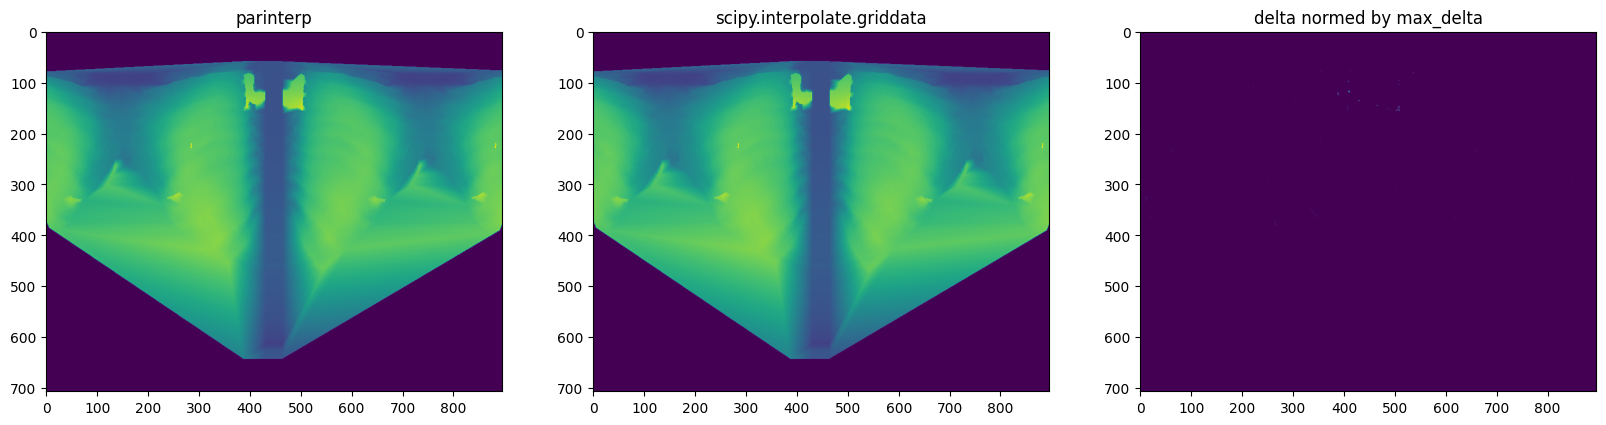

In [3]:
for k, x in tqdm(arrays.items()):
    add_cols = x.shape[1] // 4
    distances = np.concatenate((x[...,-add_cols:], x, x[...,:add_cols] ), axis=1)
    int_points = np.transpose((np.isnan(distances)).nonzero())
    x_points: np.ndarray = np.transpose((~np.isnan(distances)).nonzero())
    x_values = distances[~np.isnan(distances)]
    parinterp_map = distances.copy()
    scipy_map = distances.copy()
    parinterp_values = Linear2DInterpolator(x_points, -1)(int_points, x_values, fill_value=0.0)
    scipy_values = griddata(x_points, x_values, int_points, method='linear', fill_value=0.0)

    for i, v in enumerate(parinterp_values):
        parinterp_map[int_points[i][0], int_points[i][1]] = v

    for i, v in enumerate(scipy_values):
        scipy_map[int_points[i][0], int_points[i][1]] = v

    delta = np.abs(parinterp_map - scipy_map)
    q99_delta = np.quantile(delta, 0.99)
    max_delta = np.max(delta)
    outliers_num = np.sum(delta > q99_delta)

    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    print('interpolated points shape', int_points.shape)
    print('q99 delta =', q99_delta)
    print('max delta =', max_delta)
    print('num of points where delta > q99_delta =', outliers_num)
    ax[0].imshow(parinterp_map)
    ax[0].set_title('parinterp')
    ax[1].imshow(scipy_map)
    ax[1].set_title('scipy.interpolate.griddata')
    ax[2].imshow(delta / max_delta)
    ax[2].set_title('delta normed by max_delta')
    plt.show()